# Data Science Project - Group 002 - part 3: Sentiment Analysis using NLP

## Objective
The goal of this notebook is to build and evaluate sentiment classification
models for movie reviews using different text representation techniques.

We focus on understanding how the choice of textual embeddings affects
model performance and generalization.

## Approach
The analysis includes:
- Text preprocessing and normalization
- Feature extraction using different embedding methods
- Training classification models on top of each representation
- Performance comparison using standard evaluation metrics

## Embedding Methods Compared
- **TF-IDF**: captures term importance based on frequency statistics
- **Word2Vec**: captures semantic relationships between words
- **Combined embeddings**: integrates statistical and semantic information

## Key Question
How does the choice of text representation impact sentiment classification
performance on a real-world dataset?


### Section 1 - Loading the data and dividing it into training and testing

In [2]:
# If installs are needed:

!pip install textblob
!pip install wordcloud
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     ------------ --------------------------- 3.9/12.8 MB 15.6 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 23.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 23.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [67]:
#Section 2
from sklearn.model_selection import train_test_split
import nltk
# Import Basis Libraries    
import pandas as pd
# Import Regular Expression - for Remove HTML Tags
import re
# From String we Imorts Punctuation - for Remove Punctuations.
import string
# Import this Library to Handle the Spelling Issue - for Spelling Correction.
from textblob import TextBlob
# Import NLTK library - for remove Stopwords.
import nltk
from nltk.corpus import stopwords
# Import Libraray - for Word tokenize
from nltk.tokenize import word_tokenize,sent_tokenize
# # Import PorterStemmer from NLTK Library - for Stemming
# from nltk.stem.porter import PorterStemmer
# We Will Import WordNetLemmatizer from NLTK Library - for Lemmatization
from nltk.stem import WordNetLemmatizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import numpy as np
import os
import pickle
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import spacy
from nltk.stem import PorterStemmer

df = pd.read_csv("Q3_dataset.csv")
# Head
df.head()

,review,sentiment
0,I see quite a few positive reviews on this boa...,negative
1,"In order to avoid confusion, let me clarify a ...",negative
2,When I was in school I made a film about a cou...,negative
3,"If, like me, you actively seek out the rarest ...",negative
4,The opening 5 minutes gave me hope. Then Meyer...,negative


In [4]:
# Split into training set (90%) and test set (10%)
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['sentiment'])
train_df.head()


,review,sentiment
9447,"In this installment of the series, Edmund Blac...",positive
6813,I think that Vanessa Marcil is the best actor ...,positive
3086,This film is probably the worst film that I ha...,negative
5426,WARNING: Reading this entry after watching the...,positive
540,"Wow, did this episode start on a STOOOOOPID pr...",negative


### Section 2 - preprocessing
#### Lowercasing
Lowercasing in NLP preprocessing converts all text to lowercase, ensuring consistency and standardization by treating words with different cases (e.g., "Word" and "word") as identical. This reduces vocabulary size, improving model efficiency, and simplifies subsequent steps like tokenization and feature extraction, ultimately leading to more accurate and robust models.

In [6]:
#Lowercase the Whole Corpus by using lower() function of Python
train_df['review'] = train_df['review'].str.lower()
train_df.head()

,review,sentiment
9447,"in this installment of the series, edmund blac...",positive
6813,i think that vanessa marcil is the best actor ...,positive
3086,this film is probably the worst film that i ha...,negative
5426,warning: reading this entry after watching the...,positive
540,"wow, did this episode start on a stooooopid pr...",negative


#### Remove HTML Tags and URLs
Removing HTML tags in NLP preprocessing eliminates irrelevant formatting and metadata, ensuring that only meaningful text is analyzed. This step reduces noise and helps focus on the actual content, making it crucial for analyzing web data or documents with HTML markup, leading to more accurate NLP results.
Removing URLs in NLP preprocessing eliminates irrelevant web-specific elements that can distort analysis and confuse models. This step ensures the focus remains on the relevant textual content, improving the accuracy of tasks like sentiment analysis, text classification, and information extraction by reducing noise and enhancing model performance.

In [8]:
train_df.head(10)

,review,sentiment
9447,"in this installment of the series, edmund blac...",positive
6813,i think that vanessa marcil is the best actor ...,positive
3086,this film is probably the worst film that i ha...,negative
5426,warning: reading this entry after watching the...,positive
540,"wow, did this episode start on a stooooopid pr...",negative
6080,i remember this film from many years ago. cert...,positive
8206,"while all of the fleischer/famous studios ""sup...",positive
2882,dreary. schlocky. just plain dreadful and awfu...,negative
7468,there are a number of things that are not corr...,positive
5369,this is probably the fastest-paced and most ac...,positive


In [9]:
# Function to remove HTML Tags and URLs in one line
def clean_text(text):
    return re.sub(r'https?://\S+|www\.\S+|<.*?>', '', text)
# Apply Function to Clean the Text in the 'review' Column
train_df['review'] = train_df['review'].apply(clean_text)
train_df.head(10)  # check if HTML Tags and URLs were removed

,review,sentiment
9447,"in this installment of the series, edmund blac...",positive
6813,i think that vanessa marcil is the best actor ...,positive
3086,this film is probably the worst film that i ha...,negative
5426,warning: reading this entry after watching the...,positive
540,"wow, did this episode start on a stooooopid pr...",negative
6080,i remember this film from many years ago. cert...,positive
8206,"while all of the fleischer/famous studios ""sup...",positive
2882,dreary. schlocky. just plain dreadful and awfu...,negative
7468,there are a number of things that are not corr...,positive
5369,this is probably the fastest-paced and most ac...,positive


#### Remove Punctuations
Removing punctuation marks in NLP text preprocessing is important for improving the accuracy and efficiency of analysis. Punctuation, such as commas and periods, doesn't add significant semantic value and can create noise. By eliminating it, the text becomes cleaner and more uniform, making it easier for machine learning models to extract valuable patterns. This process also standardizes the text, ensuring consistency and enhancing performance in tasks like sentiment analysis, text classification, and named entity recognition.

In [11]:
string.punctuation
# Storing Punctuation in a Variable
def remove_punc(text):
    punc = string.punctuation
    return text.translate(str.maketrans('', '', punc))
# Remove punctuation by applying the function to each entry in the 'review' column
train_df['review'] = train_df['review'].apply(remove_punc)
train_df.head(10)  # check the result


,review,sentiment
9447,in this installment of the series edmund black...,positive
6813,i think that vanessa marcil is the best actor ...,positive
3086,this film is probably the worst film that i ha...,negative
5426,warning reading this entry after watching the ...,positive
540,wow did this episode start on a stooooopid pre...,negative
6080,i remember this film from many years ago certa...,positive
8206,while all of the fleischerfamous studios super...,positive
2882,dreary schlocky just plain dreadful and awful ...,negative
7468,there are a number of things that are not corr...,positive
5369,this is probably the fastestpaced and most act...,positive


#### Handling ChatWords
Handling ChatWords, or internet slang, is crucial in NLP preprocessing for accurate text analysis. By converting these informal terms into standard English, NLP models can better understand the text's meaning. This step improves consistency, data quality, and model performance in tasks like sentiment analysis, chatbots, and information retrieval. Ultimately, managing ChatWords leads to better comprehension and more reliable results in NLP applications.
The code defines a function, chat_conversion, that replaces text with their corresponding chat acronyms from a predefined dictionary. It iterates through each word in the input text, checks if it exists in the dictionary, and replaces it if found. The modified text is then returned.

In [13]:
# Function
def chat_conversion(text):
    chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
    }
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

# Apply the chat_conversion function directly to the 'review' column and update it
train_df['review'] = train_df['review'].apply(chat_conversion)

# Display the first few rows to see the updated reviews
print(train_df[['review']].head())

                                                 review
9447  in this installment of the series edmund black...
6813  i think that vanessa marcil is the best actor ...
3086  this film is probably the worst film that i ha...
5426  warning reading this entry after watching the ...
540   wow did this episode start on a stooooopid pre...


#### Removing stop words
Removing stop words in NLP improves analysis by eliminating common words like "the" and "is" that add little meaning. This reduces noise, lowers dataset dimensionality, and enhances the accuracy of tasks like sentiment analysis and text classification. By focusing on meaningful words, models achieve better performance and interpretation.The code defines a function, remove_stopwords, which removes stopwords from a given text. It iterates through each word in the text, checks if it is a stopword, and appends it to a new list if it is not. Then, it clears the original list, returns the modified text.

In [15]:
# Download stopwords dataset (run only once)
nltk.download('stopwords')
# Convert stopwords to a set for fast lookup (do this only once)
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure the input is a string
        return " ".join(word for word in text.split() if word.lower() not in stop_words)
    return text  # Return as-is if not a string (e.g., NaN)

# Apply function to each row in 'review' column
train_df['review'] = train_df['review'].apply(remove_stopwords)

# Display first 10 rows
train_df.head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
9447,installment series edmund blackadder stuck reg...,positive
6813,think vanessa marcil best actor cast makes sam...,positive
3086,film probably worst film ever seen im studying...,negative
5426,warning reading entry watching movie like easy...,positive
540,wow episode start stooooopid premise enterpris...,negative
6080,remember film many years ago certainly best fi...,positive
8206,fleischerfamous studios superman cartoons exce...,positive
2882,dreary schlocky plain dreadful awful lets hone...,negative
7468,number things correct although important since...,positive
5369,probably fastestpaced actionpacked german edga...,positive


#### Word tokenize
Tokenization is a key step in NLP preprocessing that divides text into smaller units (tokens), such as words or subwords. It helps standardize text, making it manageable for analysis and essential for tasks like sentiment analysis, named entity recognition, and machine translation. There are two main types of tokenization: word tokenization and sentence tokenization.

In [17]:
# Download required datasets
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize_reviews(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: word_tokenize(x))
    return df

# Apply the function to tokenize the 'review' column
train_df = tokenize_reviews(train_df, 'review')
# Display the first 10 rows to check the tokenized reviews
train_df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,sentiment
9447,"[installment, series, edmund, blackadder, stuc...",positive
6813,"[think, vanessa, marcil, best, actor, cast, ma...",positive
3086,"[film, probably, worst, film, ever, seen, im, ...",negative
5426,"[warning, reading, entry, watching, movie, lik...",positive
540,"[wow, episode, start, stooooopid, premise, ent...",negative
6080,"[remember, film, many, years, ago, certainly, ...",positive
8206,"[fleischerfamous, studios, superman, cartoons,...",positive
2882,"[dreary, schlocky, plain, dreadful, awful, let...",negative
7468,"[number, things, correct, although, important,...",positive
5369,"[probably, fastestpaced, actionpacked, german,...",positive


#### Lemmatization
Lemmatization in NLP reduces words to their dictionary form (lemma), ensuring consistency by considering part of speech, unlike stemming. It improves text normalization, reduces redundancy, and enhances tasks like sentiment analysis and topic modeling. The provided code uses WordNetLemmatizer from NLTK to tokenize a sentence, remove punctuation, lemmatize words (as verbs), and print the results in a formatted table.

In [19]:
nltk.download('punkt')

stemmer = PorterStemmer()

def preprocess_text(text):
    #Converts lists to text, performs tokenization and stemming
    if isinstance(text, list):
        text = ' '.join(text)
    text = str(text)
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def get_word_statistics(df, column='review', n=10):
    df[column] = df[column].apply(preprocess_text)  # Running the Processing

    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df[column])

    word_count = X.sum(axis=0)
    words_freq = [(word, word_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    words_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    
    most_common = words_df.head(n)
    rarest_words = words_df[words_df['Frequency'] == 1].head(n)
    total_unique_words = len(words_df)

    return {
        'Most Common Words': most_common,
        'Rarest Words': rarest_words,
        'Total Unique Words': total_unique_words
    }

train_df['processed_review'] = train_df['review'].apply(preprocess_text)
word_stats = get_word_statistics(train_df, column='processed_review', n=10)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### function get a string of words and return root string of words without damging negation words.


In [21]:
nlp = spacy.load("en_core_web_sm")

def get_word_lemma(word):
    doc = nlp(word)
    if doc:
        return doc[0].lemma_
    return word

def geti_root_words(text):
    #print(text)
    words = text#.split()
    modified_words = []

    for word in words:
        if len(word) > 2 and word[-2:].lower() == "nt": 
            modified_words.append(word)
        else:
            modified_words.append(get_word_lemma(word))
    return " ".join(modified_words)



In [22]:
train_df
train_df['review'] = train_df['review'].apply(geti_root_words)


### Section 3 - Vocabulary Analysis

In [24]:
#divide X, y 
X_train, X_test, y_train, y_test = train_df['review'],test_df['review'], train_df['sentiment'],test_df['sentiment']
print(f'shape of train data is {X_train.shape}, {y_train.shape}')
print(f'shape of test data is {X_test.shape}, {y_test.shape}')

shape of train data is (9000,), (9000,)
shape of test data is (1000,), (1000,)


In [25]:
#Summary of the dataset
df.describe()

,review,sentiment
count,10000,10000
unique,9981,2
top,This HAS to be my guilty pleasure. I am a HUGE...,negative
freq,2,5000


In [26]:
#sentiment count
df['sentiment'].value_counts()

sentiment
negative    5000
positive    5000
Name: count, dtype: int64

In [27]:
train_df['review']

9447    installment series edmund blackadder stick reg...
6813    think vanessa marcil well actor cast make sam ...
3086    film probably worst film ever see I study fren...
5426    warn read entry watch movie like easy rider re...
540     wow episode start stooooopid premise enterpris...
                              ...                        
9100    great softcore sex reveal sexy plenty ignore i...
5161    mighty impress nurse betty way great ensemble ...
6974    win championship fight boxer john garfield joh...
3691    film crew shoot horror movie old supposedly cu...
131     3hour madefortv miniserie come home we blockbu...
Name: review, Length: 9000, dtype: object

In [28]:
num_rows = train_df['review'].shape[0]
print(num_rows)

9000


In [29]:
def get_word_statistics(df, column='review', n=10):
    
    df[column] = df[column].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

    # Initialize CountVectorizer with English stop words
    vectorizer = CountVectorizer(stop_words='english')

    # Transform text into a sparse matrix of word frequencies
    X = vectorizer.fit_transform(df[column])

    # Sum occurrences of each word across all rows
    word_count = X.sum(axis=0)

    # Map words to their corresponding frequencies
    words_freq = [(word, word_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    # Create a DataFrame and sort by frequency
    words_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Get the most common words
    most_common = words_df.head(n)

    # Get the rarest words (words that appear only once)
    rarest_words = words_df[words_df['Frequency'] == 1].head(n)

    # Count total unique words
    total_unique_words = len(words_df)

    # Return results
    return {
        'Most Common Words': most_common,
        'Rarest Words': rarest_words,
        'Total Unique Words': total_unique_words
    }

# Example usage
word_stats = get_word_statistics(train_df, column='review', n=5)

print("Most Common Words:")
print(word_stats['Most Common Words'].reset_index(drop=True))

print("\nRarest Words:")
print(word_stats['Rarest Words'].reset_index(drop=True))

print("\nTotal Unique Words:", word_stats['Total Unique Words'])



Most Common Words:
    Word  Frequency
0  movie      18006
1   film      16845
2   make       8002
3   like       7962
4   time       5421

Rarest Words:
                Word  Frequency
0            busride          1
1          rescuetom          1
2            jeanane          1
3  overblownfeminist          1
4   breakdownfinally          1

Total Unique Words: 64675


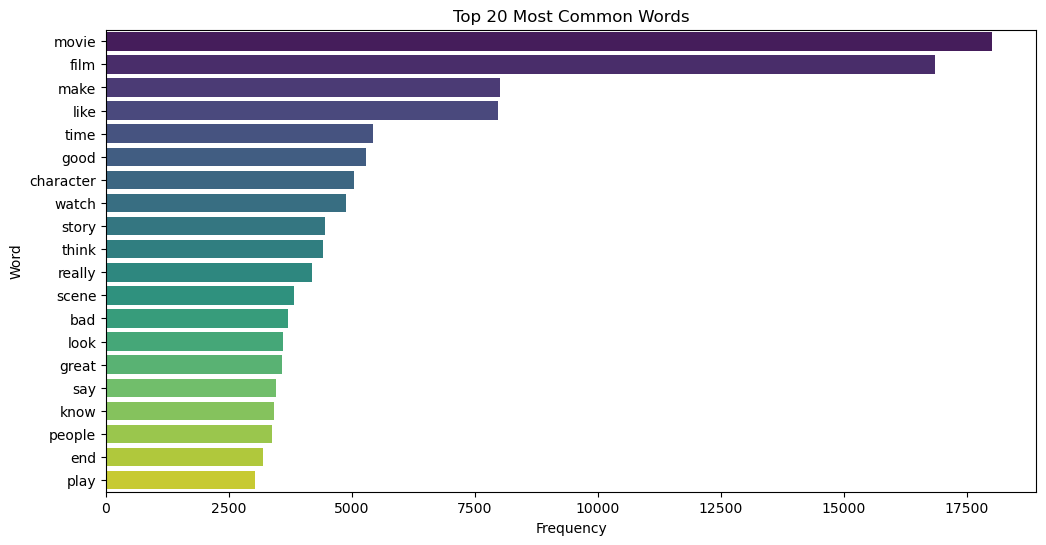

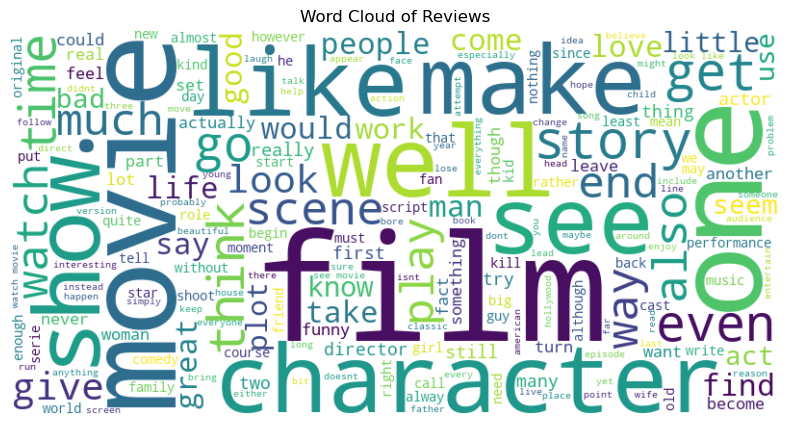

In [30]:
def visualize_word_distribution(df, column='review', top_n=20):
    """
    Function to visualize the distribution of words in a text column.

    :param df: DataFrame containing the text data.
    :param column: Name of the column containing the text.
    :param top_n: Number of most frequent and rarest words to display in the graphs.
    """

    # Use CountVectorizer to compute word frequencies
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df[column])
    word_count = X.sum(axis=0)
    
    # Create a DataFrame with word frequencies
    words_freq = [(word, word_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Plot 1: Bar chart of the most common words
    plt.figure(figsize=(12, 6))
    sns.barplot(x=words_df.head(top_n)['Frequency'], y=words_df.head(top_n)['Word'], palette='viridis')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(f'Top {top_n} Most Common Words')
    plt.show()

    # Plot 3: Word cloud visualization
    text = " ".join(df[column].dropna())  # Combine all text data into a single string
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axis for better display
    plt.title("Word Cloud of Reviews")
    plt.show()
# Call the function to visualize word distributions
visualize_word_distribution(train_df, column='review', top_n=20)


### Section 4 - TF-IDF Classifier

Confusion Matrix Values: TN=381, FP=119, FN=42, TP=458
Accuracy: 0.8390
Precision: 0.7938
Recall: 0.9160
F1-Score: 0.8505


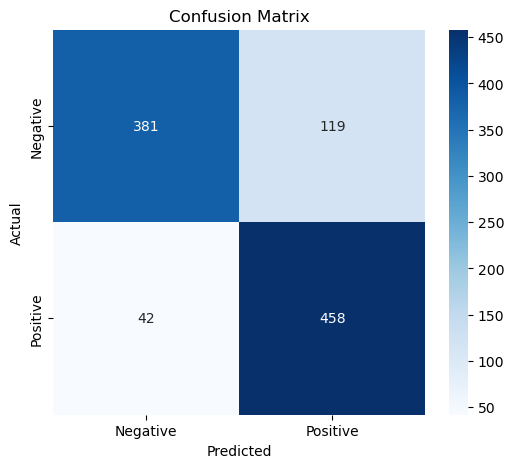

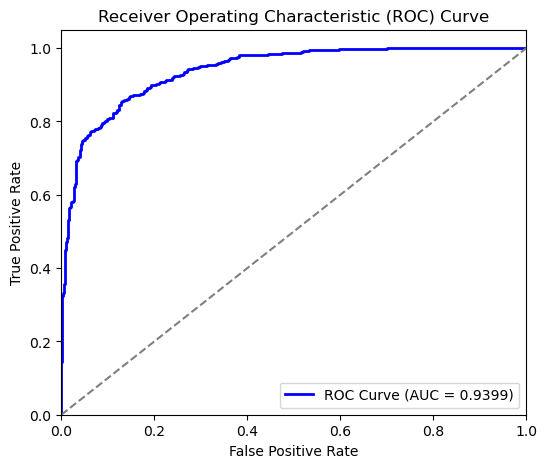

In [32]:
def train_tfidf_classifier(X_train, X_test, y_train, y_test, model_path='tfidf_model.pkl', retrain=True):
    # Ensure X_train and X_test are lists of strings
    X_train = [" ".join(doc) if isinstance(doc, list) else str(doc) for doc in X_train]
    X_test = [" ".join(doc) if isinstance(doc, list) else str(doc) for doc in X_test]
    
    # Convert labels to binary (0 and 1)
    lb = LabelBinarizer()
    y_train = lb.fit_transform(y_train).ravel()
    y_test = lb.transform(y_test).ravel()

    # Create TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(
        min_df=2,             # Include words that appear in at least 2 documents
        max_df=0.7,           # Exclude words that appear in more than 70% of the documents
        ngram_range=(1,3),    # Use unigrams, bigrams, and trigrams
        sublinear_tf=True,    # Apply logarithmic scaling to term frequency
        stop_words='english'  # Remove common stop words (only if text is in English)
    )
    
    if not retrain and os.path.exists(model_path):
        with open(model_path, 'rb') as file:
            model, vectorizer = pickle.load(file)
    else:
        X_train_emb_tfidf = vectorizer.fit_transform(X_train)
        X_test_emb_tfidf = vectorizer.transform(X_test)
        
        # Train Logistic Regression model
        model = LogisticRegression()
        model.fit(X_train_emb_tfidf, y_train)
        
        # Save model
        with open(model_path, 'wb') as file:
            pickle.dump((model, vectorizer), file)
    
    # Transform test data
    X_train_emb_tfidf = vectorizer.transform(X_train)
    X_test_emb_tfidf = vectorizer.transform(X_test)
    
    # Predict results
    y_pred = model.predict(X_test_emb_tfidf)
    y_pred_prob = model.predict_proba(X_test_emb_tfidf)[:, 1]  # Get probability for the positive class
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Extract confusion matrix values
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate performance metrics manually
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Print key metrics (without classification report)
    print(f"Confusion Matrix Values: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f'Accuracy: {accuracy:.4f}')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

    # Display Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return model, X_train_emb_tfidf, X_test_emb_tfidf

# Call the function
model_tfidf, X_train_emb_tfidf, X_test_emb_tfidf = train_tfidf_classifier(X_train, X_test, y_train, y_test)



### Section 5 - Word2Vec Classifier

Saved trained Word2Vec model.
Confusion Matrix Values: TN=400, FP=100, FN=92, TP=408
Accuracy: 0.8080
Precision: 0.8031
Recall: 0.8160
F1-Score: 0.8095


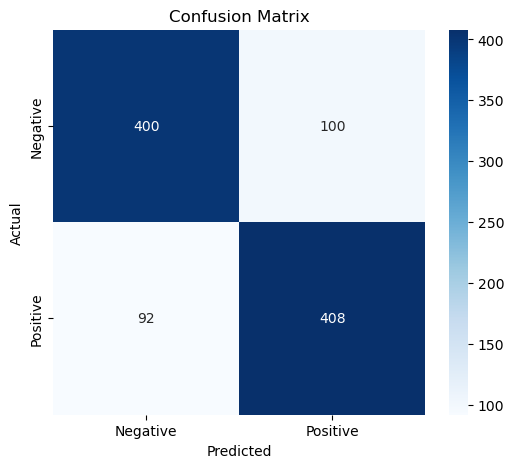

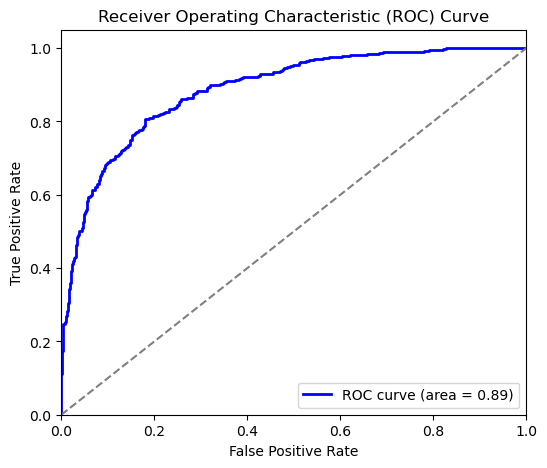

In [34]:
def get_document_embedding(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

def train_word2vec_classifier(X_train, X_test, y_train, y_test, model_path='word2vec_model.pkl', retrain=True):
    # Convert labels to numerical values
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Ensure documents are strings before tokenization
    X_train = [" ".join(map(str, doc)) if isinstance(doc, list) else str(doc) for doc in X_train]
    X_test = [" ".join(map(str, doc)) if isinstance(doc, list) else str(doc) for doc in X_test]
    X_train_tokens = [text.split() for text in X_train]
    X_test_tokens = [text.split() for text in X_test]
    
    # Load or train the Word2Vec model
    if not retrain and os.path.exists(model_path):
        with open(model_path, 'rb') as file:
            word2vec_model = pickle.load(file)
        print("Loaded pre-trained Word2Vec model.")
    else:
        word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=300, window=10, min_count=2, sg=1, workers=4, epochs=10)
        with open(model_path, 'wb') as file:
            pickle.dump(word2vec_model, file)
        print("Saved trained Word2Vec model.")
    
    # Generate document embeddings
    X_train_emb_word2vec = np.array([get_document_embedding(tokens, word2vec_model, word2vec_model.vector_size) for tokens in X_train_tokens])
    X_test_emb_word2vec = np.array([get_document_embedding(tokens, word2vec_model, word2vec_model.vector_size) for tokens in X_test_tokens])
    
    # Standardize the embeddings
    scaler = StandardScaler()
    X_train_emb_word2vec = scaler.fit_transform(X_train_emb_word2vec)
    X_test_emb_word2vec = scaler.transform(X_test_emb_word2vec)
    
    # Train Logistic Regression model
    model = LogisticRegression(solver='saga', max_iter=5000)
    model.fit(X_train_emb_word2vec, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test_emb_word2vec)
    y_prob = model.predict_proba(X_test_emb_word2vec)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    print(f'Confusion Matrix Values: TN={tn}, FP={fp}, FN={fn}, TP={tp}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return model, X_train_emb_word2vec, X_test_emb_word2vec

model_word2vec, X_train_emb_word2vec, X_test_emb_word2vec = train_word2vec_classifier(X_train, X_test, y_train, y_test, model_path='word2vec_model.pkl', retrain=True)


### Section 6 - Word2Vec vs TF-IDF comparisson

**Key Differences Between Word2Vec and TF-IDF Results:**

| Metric  | Word2Vec Classifier | TF-IDF Classifier | Difference |
|---------|---------------------|-------------------|------------|
| **Accuracy** | **80.8%** | **83.9%** | TF-IDF performed better overall. |
| **Negative Precision** | 0.800 | 0.762 | Word2Vec was slightly better at correctly identifying negative cases. |
| **Negative Recall** | 0.813 | 0.866 | TF-IDF was better at capturing actual negative cases. |
| **Negative F1-Score** | 0.806 | 0.810 | TF-IDF had a marginal advantage in balancing precision & recall for negatives. |
| **Positive Precision** | 0.8031 | 0.7938 | Word2Vec was slightly better at avoiding false positives. |
| **Positive Recall** | 0.8160 | 0.9160 | TF-IDF was much better at capturing actual positive cases. |
| **Positive F1-Score** | 0.8095 | 0.8505 | TF-IDF balanced precision and recall better for positive cases. |

**Observations:**
* TF-IDF outperformed Word2Vec overall in accuracy and F1-score for positive cases.
* Word2Vec had slightly better precision for negative cases but lower recall.
* TF-IDF achieved better recall, meaning it captured more true positive and negative cases.
* Word2Vec missed more positive cases, while TF-IDF was more biased towards positive classification.


### Section 7 - Word2Vec advantage and disadvantage comparisson

**Word2Vec and TF-IDF: Key Differences**

Word2Vec and TF-IDF represent text in fundamentally different ways, each with its advantages and drawbacks:

**Advantages of Word2Vec:**
* Semantic Relationships: Word2Vec captures word meaning through dense vector representations, while TF-IDF treats words independently.
* Context Awareness: Word2Vec understands words based on surrounding context, unlike TF-IDF, which only uses word frequency.
* Dimensionality: Word2Vec creates lower-dimensional vectors, reducing sparsity, while TF-IDF creates sparse, high-dimensional vectors.
* Handling Rare Words: Word2Vec infers meanings of rare words from context, whereas TF-IDF struggles with them.

**Disadvantages of Word2Vec:**
* Data Requirements: Word2Vec requires large datasets to capture meaningful word relationships, and it may not perform well with small datasets.
* Hyperparameter Sensitivity: Word2Vec’s performance depends heavily on selecting the right parameters (e.g., vector_size, window, min_count).
* Training Time: Word2Vec can be computationally intensive and time-consuming compared to simpler methods like TF-IDF.

**Results Analysis:**
* Accuracy: TF-IDF outperformed Word2Vec (83.9% vs. 80.8%), indicating that TF-IDF was better at classifying sentiment in this dataset.
* Recall & Precision:** Word2Vec had higher recall for negative cases (81.3%) but struggled with positive cases (81.6% recall). TF-IDF performed better on positive cases (91.6% recall), though it had a slightly lower recall for negative cases (86.6%).
* Precision Trade-Off: TF-IDF had higher precision for positive cases (79.4%), making it more effective in capturing true positives.

**Why Word2Vec Underperformed:**
* Data Size: Word2Vec requires large datasets to learn effective word embeddings. If the dataset is small, its performance can be limited.
* Hyperparameters: The chosen Word2Vec parameters may not have been optimal, affecting its ability to capture relevant word relationships.
* Task Suitability: TF-IDF’s frequency-based approach may have been more suitable for this classification task, particularly if the dataset consists of short text segments.

**Conclusion:**
Although Word2Vec theoretically offers several advantages, TF-IDF performed better in this specific classification task. Word2Vec may need more data, better tuning, or pre-trained embeddings to show its full potential.


### Section 8 - Integrated Model

Saved trained Word2Vec model.
Confusion Matrix Values: TN=405, FP=95, FN=84, TP=416
Accuracy: 0.8210
Precision: 0.8141
Recall: 0.8320
F1-Score: 0.8229


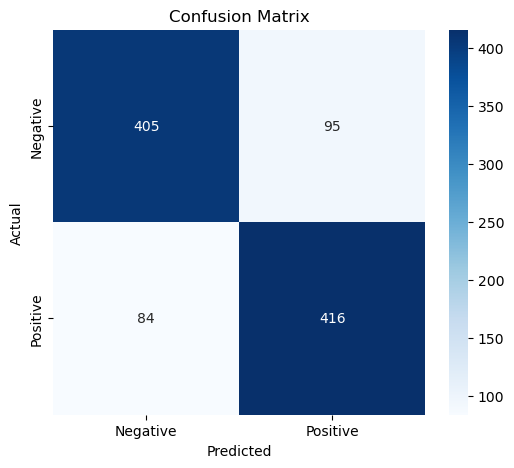

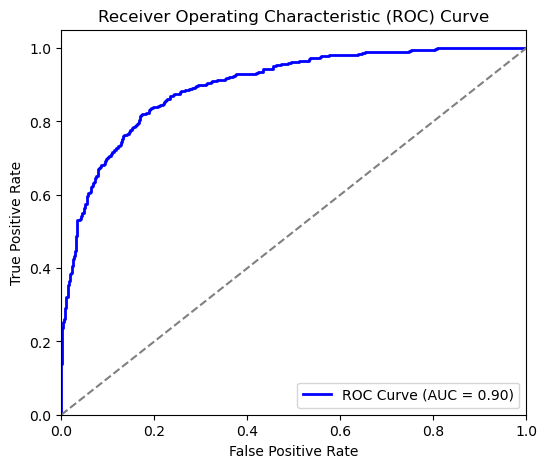

In [40]:
def train_logistic_regression(X_train_list, X_test_list, y_train, y_test):
    """
    Train a Logistic Regression model using multiple embeddings, evaluate performance, 
    visualize results with Confusion Matrix and ROC Curve.

    Parameters:
    - X_train_list: List of different X_train embeddings (e.g., [X_train_tfidf, X_train_word2vec])
    - X_test_list: List of different X_test embeddings (e.g., [X_test_tfidf, X_test_word2vec])
    - y_train: Training labels (categorical: 'negative'/'positive')
    - y_test: Test labels (categorical: 'negative'/'positive')

    Returns:
    - trained model
    - transformed X_test (concatenated embeddings)
    """
    # Ensure embeddings are compatible: Word2Vec uses dense arrays, TF-IDF is sparse
    if isinstance(X_train_list[0], np.ndarray):
        X_train_combined = np.hstack(X_train_list)  # Use hstack for dense arrays
        X_test_combined = np.hstack(X_test_list)
    else:
        X_train_combined = hstack(X_train_list)  # Use scipy sparse hstack for TF-IDF + dense mix
        X_test_combined = hstack(X_test_list)

    # Scale only if input is dense (TF-IDF is already normalized)
    if isinstance(X_train_combined, np.ndarray):
        scaler = StandardScaler()
        X_train_combined = scaler.fit_transform(X_train_combined)
        X_test_combined = scaler.transform(X_test_combined)

    # Convert labels from categorical ('negative', 'positive') to numerical (0,1)
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # Train logistic regression
    model = LogisticRegression(solver='saga', max_iter=5000)
    model.fit(X_train_combined, y_train_encoded)

    # Predict results
    y_pred = model.predict(X_test_combined)
    y_pred_prob = model.predict_proba(X_test_combined)[:, 1]  # Probability for the positive class

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Extract Confusion Matrix values
    tn, fp, fn, tp = conf_matrix.ravel()

    # Print results
    print("Saved trained Word2Vec model.")
    print(f"Confusion Matrix Values: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Display Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return model, X_train_combined, X_test_combined

model_combined, X_train_emb_combined, X_test_emb_combined = train_logistic_regression(
    X_train_list=[X_train_emb_tfidf, X_train_emb_word2vec],
    X_test_list=[X_test_emb_tfidf, X_test_emb_word2vec],
    y_train=y_train,
    y_test=y_test
)

**Comparison of Word2Vec, TF-IDF, and Integrated Model Results:**

| Metric             | Word2Vec Classifier | TF-IDF Classifier | Integrated Model |
|----------------------|---------------------|-------------------|------------------|
| **Accuracy**         | 80.8%               | 83.9%         | 82.1%            |
| **Negative Precision**| 0.800               | 0.762             | 0.810            |
| **Negative Recall**   | 0.813               | 0.866         | 0.827            |
| **Negative F1-Score**| 0.806               | 0.810         | 0.818            |
| **Positive Precision**| 0.8031              | 0.7938            | 0.8141       |
| **Positive Recall**   | 0.8160              | 0.9160        | 0.8320           |
| **Positive F1-Score**| 0.8095              | 0.8505        | 0.8229           |

**Conclusion:**

The integrated model demonstrates an improvement over Word2Vec in terms of accuracy (82.1% vs. 80.8%) but does not outperform TF-IDF (83.9%). It achieves a balanced performance with a higher precision for positive cases (81.41%)** compared to TF-IDF (79.38%) and Word2Vec (80.31%). However, TF-IDF still has the best recall for positive cases (91.6%), while the integrated model shows a moderate recall (83.2%).

The integrated model benefits from combining word embeddings with frequency-based methods, leading to a slight enhancement in F1-score (82.29%) compared to Word2Vec (80.95%), though TF-IDF remains superior (85.05%). This suggests that while integration helps, further optimization or alternative fusion techniques may be necessary for better classification performance.

